<a href="https://colab.research.google.com/github/gladysbabs/Machine-Learning-Project-Classification-Problem/blob/main/Project_2_Part_1_(Core)_Gladys_Babirye.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Project 2


## Project Overview: To predict metabolic syndrome, yes or not based on common risk factors.
- **DATASET 1:** Metabolic Syndrome.

In [3]:
#imports
import pandas as pd
import numpy as np

In [9]:
df=pd.read_csv('/content/drive/MyDrive/CodingDojo/02-IntroML/Week07/Data/Metabolic Syndrome.csv')
df.head()

,seqn,Age,Sex,Marital,Income,Race,WaistCirc,BMI,Albuminuria,UrAlbCr,UricAcid,BloodGlucose,HDL,Triglycerides,MetabolicSyndrome
0,62161,22,Male,Single,8200.0,White,81.0,23.3,0,3.88,4.9,92,41,84,No MetSyn
1,62164,44,Female,Married,4500.0,White,80.1,23.2,0,8.55,4.5,82,28,56,No MetSyn
2,62169,21,Male,Single,800.0,Asian,69.6,20.1,0,5.07,5.4,107,43,78,No MetSyn
3,62172,43,Female,Single,2000.0,Black,120.4,33.3,0,5.22,5.0,104,73,141,No MetSyn
4,62177,51,Male,Married,NaN,Asian,81.1,20.1,0,8.13,5.0,95,43,126,No MetSyn


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2401 entries, 0 to 2400
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   seqn               2401 non-null   int64  
 1   Age                2401 non-null   int64  
 2   Sex                2401 non-null   object 
 3   Marital            2193 non-null   object 
 4   Income             2284 non-null   float64
 5   Race               2401 non-null   object 
 6   WaistCirc          2316 non-null   float64
 7   BMI                2375 non-null   float64
 8   Albuminuria        2401 non-null   int64  
 9   UrAlbCr            2401 non-null   float64
 10  UricAcid           2401 non-null   float64
 11  BloodGlucose       2401 non-null   int64  
 12  HDL                2401 non-null   int64  
 13  Triglycerides      2401 non-null   int64  
 14  MetabolicSyndrome  2401 non-null   object 
dtypes: float64(5), int64(6), object(4)
memory usage: 281.5+ KB


- Source of data
   - Metabolic Syndrome Prediction dataset from data.world

- Brief description of data
   - This is data with the following variables: abnormal waist circumference, triglycerides above 150, HDL cholesterol below 50 in women or 40 in men, history of hypertension and mildly elevated fasting blood sugar (100-125), Albuminuria levels, and other variables such as uric acid, race, income, marital status, bmi, and sex. All this data might contribute to a suitable predictive model which shall be tested.

- What is the target?
   - MetabolicSyndrome

- What does one row represent? (A person? A business? An event? A product?)
  - One row represents a person.

- Is this a classification or regression problem?
   - With the target variable being categorical, this is a classification problem.

- How many features does the data have?
  - 13 features
- How many rows are in the dataset?
  - 2401 rows are in this dataset.

- What, if any, challenges do you foresee in cleaning, exploring, or modeling this dataset?
   - Cleaning: There are missing values that need to be addressed. There might be some data inconsistencies,and maybe duplicates as well.
   - Exploring: Missing values need to be addressed appropriately to ensure accurate exploration and preparation of the data for modeling.
   - Modeling: Selecting the appropriate models seems to be a foreseeable challenge for this dataset.


### Unnecessary Columns

- To predict metabolic syndrome, the following columns will be dropped due to their insignificance in the dataset:
  - seqn, Marital, and Income.

In [10]:
#Dropping the unnecessary columns:
df.drop(columns=['seqn', 'Marital','Income'],inplace=True)

### Duplicates

In [12]:
#Checking for duplicated records:
df.duplicated().sum()

0

- There are no duplicate rows.

### Missing values

In [13]:
#Checking for missing values:
df.isna().sum()

Age                   0
Sex                   0
Race                  0
WaistCirc            85
BMI                  26
Albuminuria           0
UrAlbCr               0
UricAcid              0
BloodGlucose          0
HDL                   0
Triglycerides         0
MetabolicSyndrome     0
dtype: int64

- Columns with missing values: 'WaistCirc','BMI'.
- Need to find the most appropriate way to address them. And I will use visualizations.

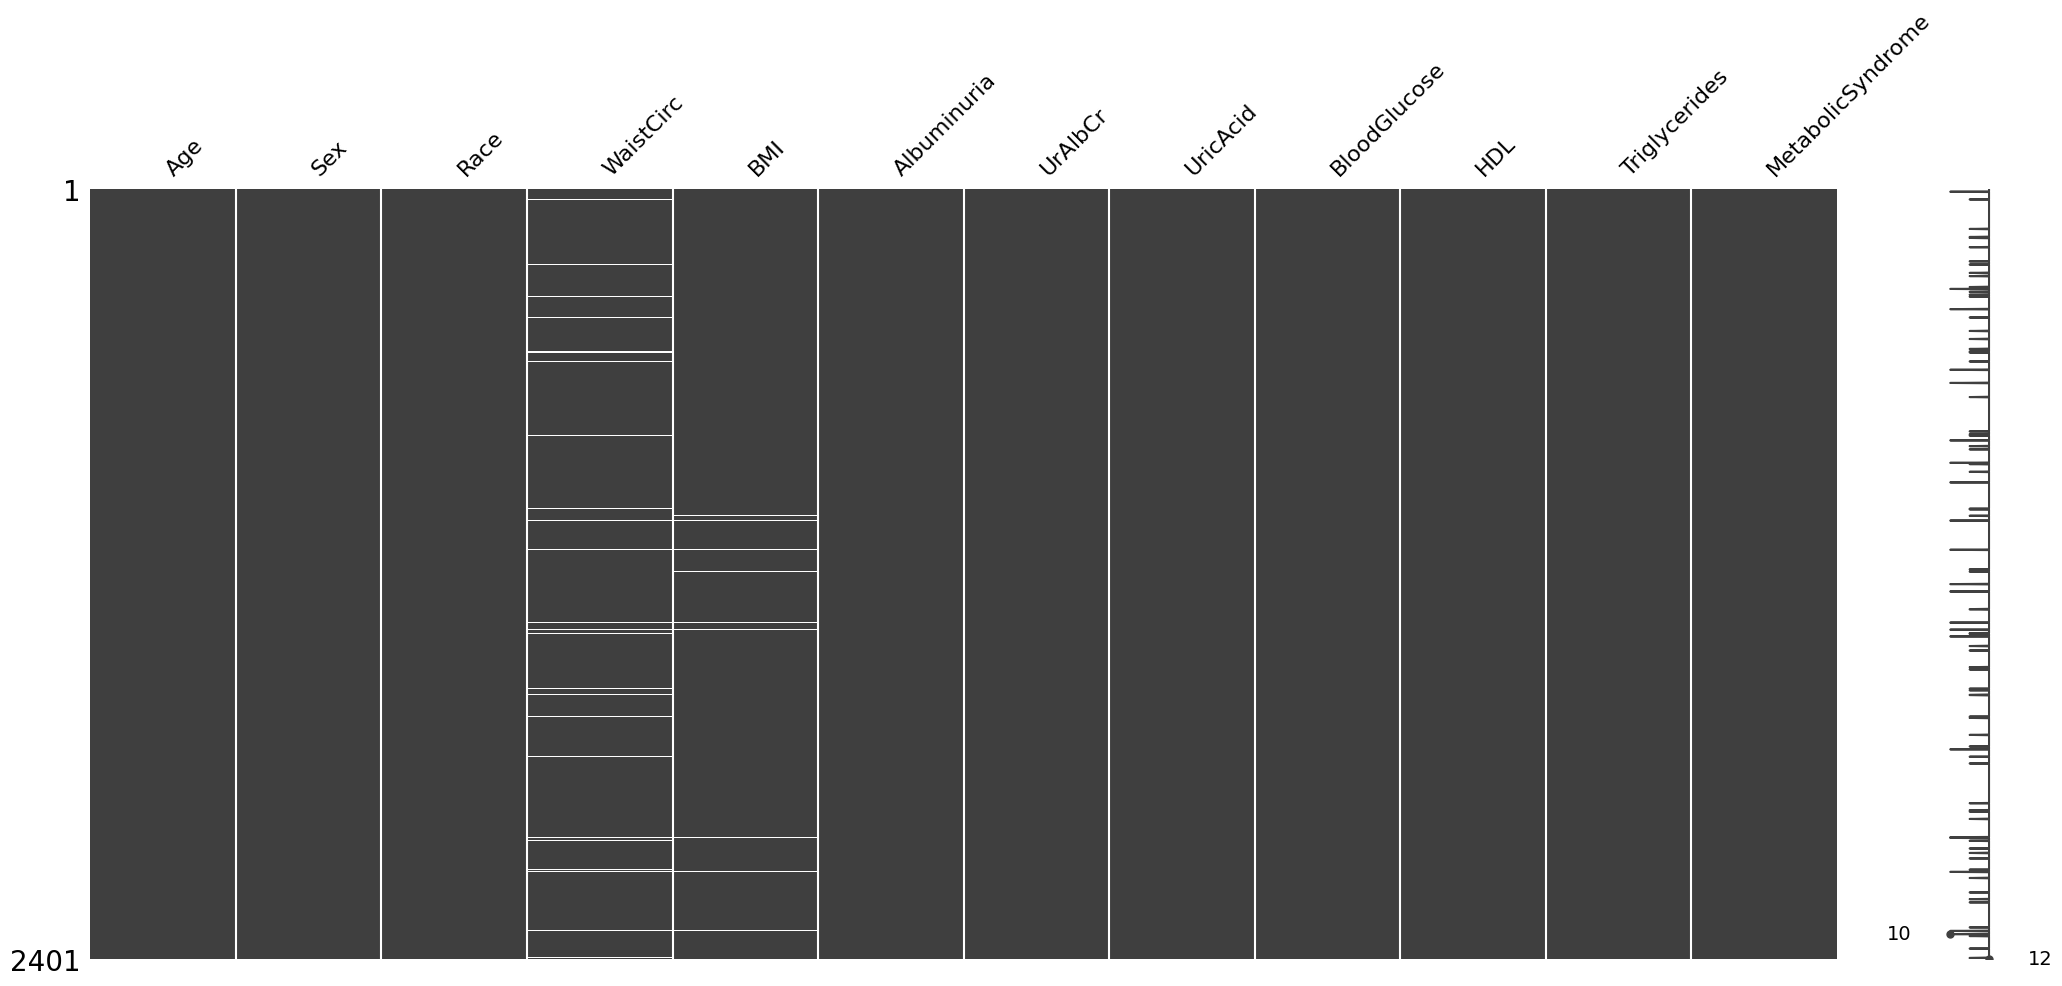

In [14]:
#Using missingno to visualize the missing values:
import missingno as msno
msno.matrix(df);

In [4]:
#imports
import seaborn as sns

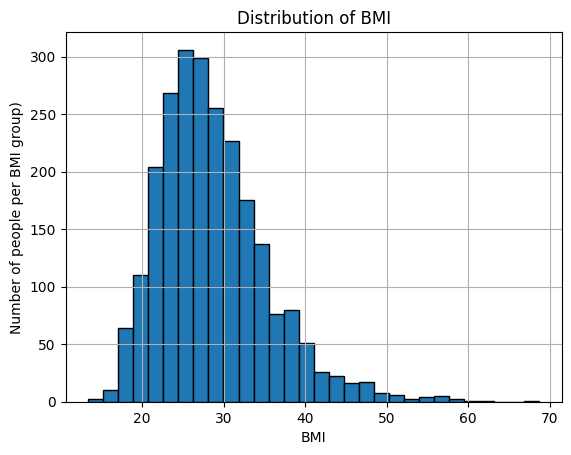

In [33]:
ax=df['BMI'].hist(bins=30, edgecolor='black')
ax.set_xlabel('BMI')
ax.set_ylabel('Number of people per BMI group)')
ax.set_title('Distribution of BMI');

-  The distribution is slightly positively skewed hence I'll go with imputing using the median.

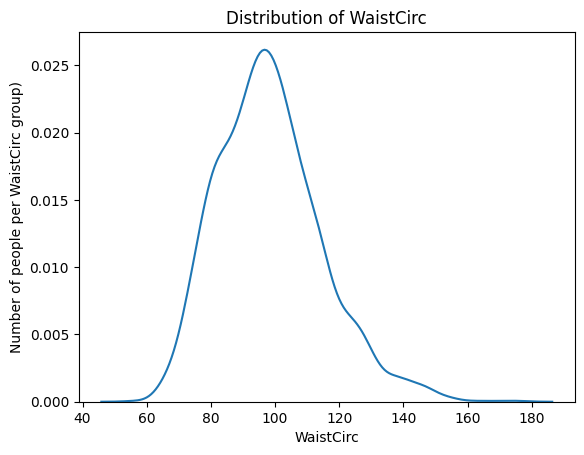

In [31]:
#WaistCirc
ax=sns.kdeplot(df['WaistCirc'])
ax.set_xlabel('WaistCirc')
ax.set_ylabel('Number of people per WaistCirc group)')
ax.set_title('Distribution of WaistCirc');

- This a symmetrically distributed graph, and hence my imputing strategy will be by using the mean.

### Data Inconsistencies

In [34]:
cat_cols=df.select_dtypes('object')

In [35]:
for cols in cat_cols:
    print(f"The value counts for {cols}")
    print(df[cols].value_counts())
    print('\n')

The value counts for Sex
Sex
Female    1211
Male      1190
Name: count, dtype: int64


The value counts for Race
Race
White          933
Black          548
Asian          349
Hispanic       257
MexAmerican    253
Other           61
Name: count, dtype: int64


The value counts for MetabolicSyndrome
MetabolicSyndrome
No MetSyn    1579
MetSyn        822
Name: count, dtype: int64




In [37]:
df.describe()

,Age,WaistCirc,BMI,Albuminuria,UrAlbCr,UricAcid,BloodGlucose,HDL,Triglycerides
count,2401.000000,2316.000000,2375.000000,2401.000000,2401.000000,2401.000000,2401.000000,2401.000000,2401.000000
mean,48.691795,98.307254,28.702189,0.154102,43.626131,5.489046,108.247813,53.369429,128.125364
std,17.632852,16.252634,6.662242,0.422780,258.272829,1.439358,34.820657,15.185537,95.322477
min,20.000000,56.200000,13.400000,0.000000,1.400000,1.800000,39.000000,14.000000,26.000000
25%,34.000000,86.675000,24.000000,0.000000,4.450000,4.500000,92.000000,43.000000,75.000000
50%,48.000000,97.000000,27.700000,0.000000,7.070000,5.400000,99.000000,51.000000,103.000000
75%,63.000000,107.625000,32.100000,0.000000,13.690000,6.400000,110.000000,62.000000,150.000000
max,80.000000,176.000000,68.700000,2.000000,5928.000000,11.300000,382.000000,156.000000,1562.000000


- I see no inconsistencies in the numerical data.

### Visualizations
- Univariant visualizations

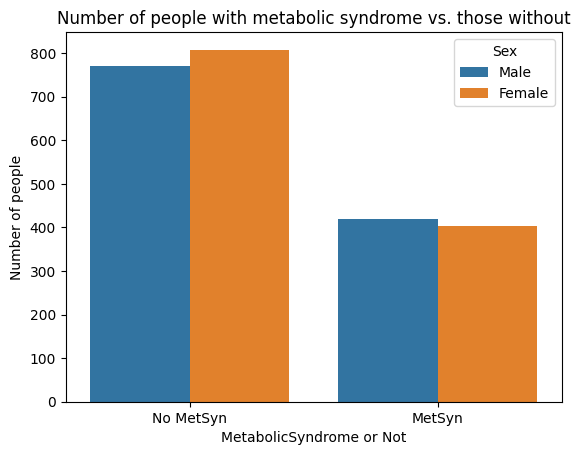

In [42]:
#countplot showing the Target (number of people with metabolic syndrome vs. those without)
ax=sns.countplot(df,x=df['MetabolicSyndrome'],hue='Sex')
ax.set_xlabel('MetabolicSyndrome or Not')
ax.set_ylabel('Number of people')
ax.set_title('Number of people with metabolic syndrome vs. those without');

- Predominantly, Metabolic syndrome is amongst the Males while the Females predominantly don't have Metabolic syndrome.

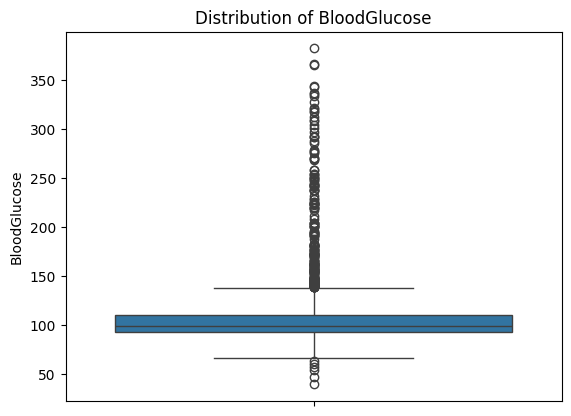

In [44]:
#Boxplot for the BloodGlucouse column.
ax=sns.boxplot(df, y=df['BloodGlucose'])
ax.set_title('Distribution of BloodGlucose');

- Blood Glucose levels amongst the people within this dataset are averagely at 100. T
- There are so many outliers beyond 140 and some below 70.

## Project Overview: Predicting the customer churn rate within the Telecom industry.
 - **DATASET 2**: Dataset on telecom_customer_churn.


In [5]:
df_cust=pd.read_csv('/content/drive/MyDrive/CodingDojo/02-IntroML/Week07/Data/churn_Data.csv')
df_cust.head()

,tenure,age,address,income,ed,employ,equip,callcard,wireless,churn
0,11,33,7,136,5,5,0,1,1,1
1,33,33,12,33,2,0,0,0,0,1
2,23,30,9,30,1,2,0,0,0,0
3,38,35,5,76,2,10,1,1,1,0
4,7,35,14,80,2,15,0,1,0,0


In [5]:
df_cust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   tenure    200 non-null    int64
 1   age       200 non-null    int64
 2   address   200 non-null    int64
 3   income    200 non-null    int64
 4   ed        200 non-null    int64
 5   employ    200 non-null    int64
 6   equip     200 non-null    int64
 7   callcard  200 non-null    int64
 8   wireless  200 non-null    int64
 9   churn     200 non-null    int64
dtypes: int64(10)
memory usage: 15.8 KB


- Source of data
  - This is a kaggle dataset on telecom customer churn.

- Brief description of data
  - This is a dataset with the following features: tenure, age, income,equipment availability, number of years employed,callcard and wireless technology.

- What is the target?
  - churn

- What does one row represent? (A person? A business? An event? A product?)
  - One row represents a person.

- Is this a classification or regression problem?
  - This is a binary classification problem predicting if the customer will churn(class 1) or not(class 0).

- How many features does the data have?
  - 9 features.

- How many rows are in the dataset?
  - 200 rows.

- What, if any, challenges do you foresee in cleaning, exploring, or modeling this dataset?
  - Cleaning: There might be duplicated data or even some data inconsistencies that will need to be addressed.
  - Exploring: I do not necessarily see any challenges on exploring this dataset.
  - Modeling: Finding the appropriate model to predict the churn rate will be challenging while testing various models or tuning them to get the most appropriate one.

### Unnecessary columns

In [47]:
#Dropping unnecessary columns that wouldn't help in the task of predicting the churn rate in telecom
# Dropping the following columns: 'address','ed'
df_cust.drop(columns=['address','ed'],inplace=True)

### Duplicates

In [49]:
df_cust.duplicated().sum()

0

- No duplicates.

### Missing values

In [50]:
df_cust.isna().sum()

tenure      0
age         0
income      0
employ      0
equip       0
callcard    0
wireless    0
churn       0
dtype: int64

- No missing values.

### Data inconsistencies

In [54]:
df_cust.describe()

,tenure,age,income,employ,equip,callcard,wireless,churn
count,200.000000,200.000000,200.000000,200.00000,200.000000,200.000000,200.000000,200.000000
mean,35.505000,41.165000,75.130000,10.22500,0.425000,0.705000,0.290000,0.290000
std,21.640971,13.076803,128.430468,8.95743,0.495584,0.457187,0.454901,0.454901
min,1.000000,19.000000,9.000000,0.00000,0.000000,0.000000,0.000000,0.000000
25%,16.750000,31.000000,31.000000,3.00000,0.000000,0.000000,0.000000,0.000000
50%,33.500000,40.000000,48.000000,7.50000,0.000000,1.000000,0.000000,0.000000
75%,55.250000,51.000000,80.000000,17.00000,1.000000,1.000000,1.000000,1.000000
max,72.000000,76.000000,1668.000000,44.00000,1.000000,1.000000,1.000000,1.000000


In [55]:
#A tenure of 72 years seems abit unrealistic
df_cust[df_cust['tenure']==72]

,tenure,age,income,employ,equip,callcard,wireless,churn
69,72,60,12,20,0,1,1,0
125,72,75,14,6,0,1,0,0
130,72,75,33,44,0,1,0,0
135,72,62,163,31,1,1,1,0
164,72,61,61,8,0,1,0,0
181,72,55,82,25,1,1,0,0


In [57]:
#When you correlate the tenure with people's ages, they don't seem to add up.
#We shall drop those records.
df_cust.drop(df_cust[df_cust['tenure'] == 72].index, inplace=True)

### Univariant Visualization

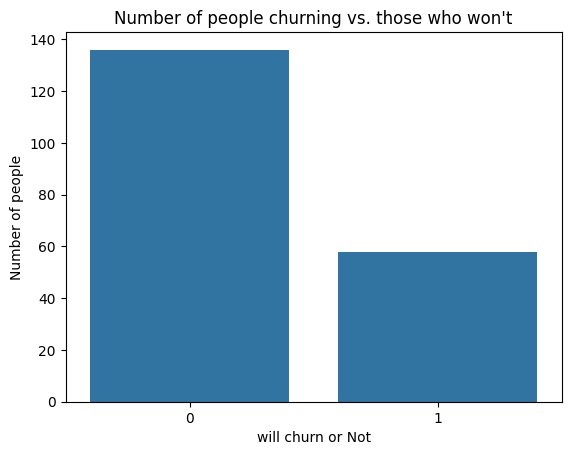

In [69]:
# Countplot for churn rate
ax=sns.countplot(df_cust,x='churn')
ax.set_xlabel('will churn or Not')
ax.set_ylabel('Number of people')
ax.set_title("Number of people churning vs. those who won't");

- This visualization clearly shows that majority of the people will not churn.

<ipython-input-7-b73bfcedba37>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax=sns.distplot(df_cust['tenure'],bins=30)


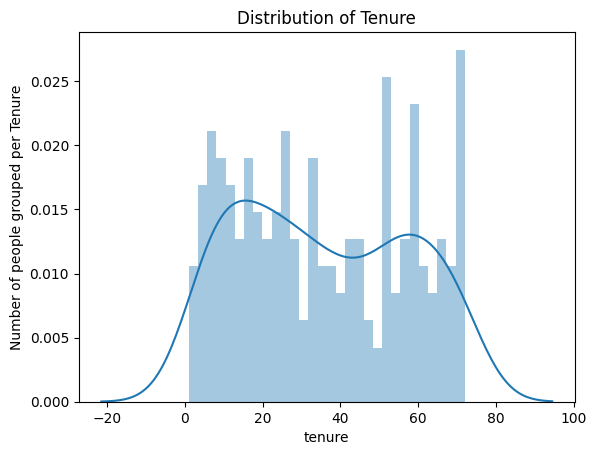

In [7]:
#Distplot showing the Tenure distribution
ax=sns.distplot(df_cust['tenure'],bins=30)
ax.set_xlabel('tenure')
ax.set_ylabel('Number of people grouped per Tenure')
ax.set_title('Distribution of Tenure');

- The distplot is showing a wavy plot distribution pattern for tenure which is a form of irregular distribution indicating an abnormal behaviour with this data. It also shows that there's more than one peak in this data.